# Train cNN network with fonts png

## imports

In [224]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import layers
from tensorflow import keras
from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf
import PIL

## load dataset from npz

In [225]:
path = '/home/andrew/Recognizerka/fonts/png32_rotated.npz'
with np.load(path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
sess = tf.Session()
print(x_train.shape)

(39270, 32, 32, 1)


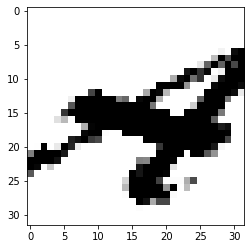

А


In [226]:
first_image = np.array(x_train[0], dtype='float')
pixels = first_image.reshape((32, 32))
plt.imshow(pixels, cmap='gray')
plt.show()
print(RUS_CHARS[y_train[0].astype(int)].decode('utf-8'))

In [227]:
x_train = sess.run(tf.random_shuffle(x_train, seed=8))
y_train = sess.run(tf.random_shuffle(y_train, seed=8))
x_test = sess.run(tf.random_shuffle(x_test, seed=12))
y_test = sess.run(tf.random_shuffle(y_test, seed=12))

In [228]:
RUS_CHARS = [
    'А'.encode('utf-8'),
    'Б'.encode('utf-8'),
    'В'.encode('utf-8'),
    'Г'.encode('utf-8'),
    'Д'.encode('utf-8'),
    'Е'.encode('utf-8'),
    'Ж'.encode('utf-8'),
    'З'.encode('utf-8'),
    'И'.encode('utf-8'),
    'Й'.encode('utf-8'),
    'К'.encode('utf-8'),
    'Л'.encode('utf-8'),
    'М'.encode('utf-8'),
    'Н'.encode('utf-8'),
    'О'.encode('utf-8'),
    'П'.encode('utf-8'),
    'Р'.encode('utf-8'),
    'С'.encode('utf-8'),
    'Т'.encode('utf-8'),
    'У'.encode('utf-8'),
    'Ф'.encode('utf-8'),
    'Х'.encode('utf-8'),
    'Ц'.encode('utf-8'),
    'Ч'.encode('utf-8'),
    'Ш'.encode('utf-8'),
    'Щ'.encode('utf-8'),
    'Ъ'.encode('utf-8'),
    'Ы'.encode('utf-8'),
    'Ь'.encode('utf-8'),
    'Э'.encode('utf-8'),
    'Ю'.encode('utf-8'),
    'Я'.encode('utf-8'),
    'Ё'.encode('utf-8'),
    'а'.encode('utf-8'),
    'б'.encode('utf-8'),
    'в'.encode('utf-8'),
    'г'.encode('utf-8'),
    'д'.encode('utf-8'),
    'е'.encode('utf-8'),
    'ж'.encode('utf-8'),
    'з'.encode('utf-8'),
    'и'.encode('utf-8'),
    'й'.encode('utf-8'),
    'к'.encode('utf-8'),
    'л'.encode('utf-8'),
    'м'.encode('utf-8'),
    'н'.encode('utf-8'),
    'о'.encode('utf-8'),
    'п'.encode('utf-8'),
    'р'.encode('utf-8'),
    'с'.encode('utf-8'),
    'т'.encode('utf-8'),
    'у'.encode('utf-8'),
    'ф'.encode('utf-8'),
    'х'.encode('utf-8'),
    'ц'.encode('utf-8'),
    'ч'.encode('utf-8'),
    'ш'.encode('utf-8'),
    'щ'.encode('utf-8'),
    'ъ'.encode('utf-8'),
    'ы'.encode('utf-8'),
    'ь'.encode('utf-8'),
    'э'.encode('utf-8'),
    'ю'.encode('utf-8'),
    'я'.encode('utf-8'),
    'ё'.encode('utf-8'),
]

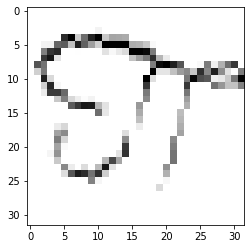

П


In [229]:
check_index = 105
first_image = np.array(x_train[check_index], dtype='float')
pixels = first_image.reshape((32, 32))
plt.imshow(pixels, cmap='gray')
plt.show()
print(RUS_CHARS[y_train[check_index].astype(int)].decode('utf-8'))

## configuration of cNN

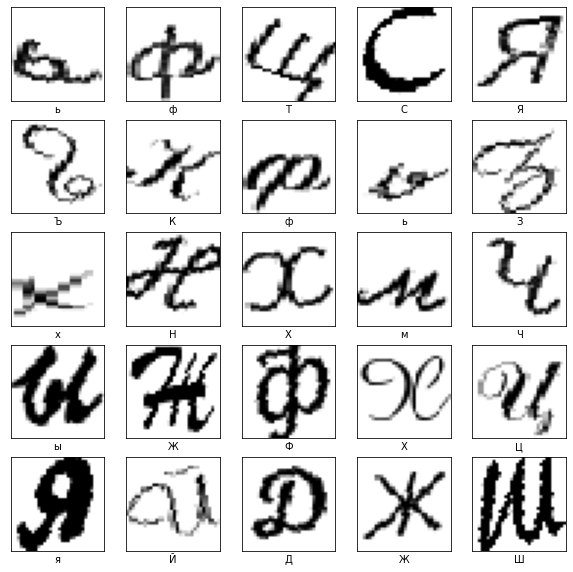

65.0
0.0


In [230]:
# Подготовка данных для запуска нейронной сети 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = y_train.astype('float32') 
y_test = y_test.astype('float32')

# Зарезервируем 1000 элементов для валидации
x_val = x_train[-1000:]
y_val = y_train[-1000:]
x_train = x_train[:-1000]
y_train = y_train[:-1000]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32), cmap='gray')
    plt.xlabel(RUS_CHARS[y_train[i].astype(int)].decode('utf-8'))
plt.show()
print(np.max(y_train))
print(np.min(y_train))

In [231]:
#keras.layers.Flatten(input_shape=(32,32)),
def create_model():
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(66))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [218]:
def create_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [232]:
model = create_model()
print(x_train.shape)

(38270, 32, 32, 1)


In [233]:
print('# Fit model on training data')
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5)

# Fit model on training data
Train on 38270 samples, validate on 1000 samples
Epoch 1/5
38270/38270 [==============================] - 42s 1ms/sample - loss: 1.4147 - acc: 0.6133 - val_loss: 0.4859 - val_acc: 0.8880
Epoch 2/5
38270/38270 [==============================] - 37s 979us/sample - loss: 0.2224 - acc: 0.9308 - val_loss: 0.2369 - val_acc: 0.9460
Epoch 3/5
38270/38270 [==============================] - 36s 939us/sample - loss: 0.1374 - acc: 0.9587 - val_loss: 0.1675 - val_acc: 0.9610
Epoch 4/5
38270/38270 [==============================] - 36s 941us/sample - loss: 0.1065 - acc: 0.9666 - val_loss: 0.1215 - val_acc: 0.9730
Epoch 5/5
38270/38270 [==============================] - 36s 942us/sample - loss: 0.0876 - acc: 0.9733 - val_loss: 0.1647 - val_acc: 0.9560


In [238]:
model.save_weights('./model_3_best/weights')
model.save_weights('/home/andrew/Recognizerka/myserv/tf_model/weights')
new_model = create_model()
new_model.summary()
new_model.load_weights('./model_2/weights')

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 4, 4, 64)        

In [234]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=2)
print('test loss, test acc:', results)


# Evaluate on test data
2310/2310 - 0s - loss: 0.0654 - acc: 0.9874
test loss, test acc: [0.06543374177778051, 0.9874459]


In [235]:
# Функция превращения изобращения в валидный для предсказания np.array
def getArrayFromImage(path):
  img = PIL.Image.open(path).convert('L')
  arr = np.array(img).reshape(32,32)[:,:,np.newaxis]
  print (arr.shape)
  return arr

(32, 32, 1)
(1, 32, 32, 1)

# Generate predictions for 3 samples
predictions shape: (1, 66)
[ -938.1331  1528.89    1824.3739   249.1457  -159.9565   315.2494
 -2647.8342   630.7119 -5494.8145 -1930.1176 -1590.1317 -6703.867
 -1055.0201   -25.1049 -1508.0132  -310.6947 -2354.4224  -887.0461
 -1978.1085 -4037.124  -3004.3086 -3061.4856 -2827.4102 -5862.4854
 -3498.3777 -3745.1653   529.4484  -521.2341  -275.7315   867.7681
 -1931.2738 -2241.271    477.6826 -4773.275  -1393.117  -2316.921
 -4787.924  -3109.877  -4283.4624 -3025.1045 -4354.825  -4437.741
 -2046.7599 -1633.6354 -5873.65   -5475.269  -5669.503  -2555.066
 -4274.4214  -678.7773 -3920.299  -4220.812  -6162.5654 -2117.499
 -1583.0189 -3075.7612 -2655.0947 -7421.9556 -5517.736  -1366.1055
 -3034.1274 -2904.9426 -1249.6715  2301.245   -452.8842 -2997.106 ]
[0]	CHAR: А ~ -938.133057
[1]	CHAR: Б ~ 1528.890015
[2]	CHAR: В ~ 1824.373901
[3]	CHAR: Г ~ 249.145737
[4]	CHAR: Д ~ -159.956497
[5]	CHAR: Е ~ 315.249359
[6]	CHAR: Ж ~ -2647.8

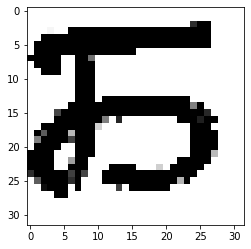

In [271]:
test_file = "/home/andrew/Recognizerka/myserv/test.png"

my_test_x = np.array(getArrayFromImage(test_file))
timg = my_test_x
my_test_x = np.array([my_test_x])

print(my_test_x.shape)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(my_test_x)
print('predictions shape:', predictions.shape)

def get_char_from_pred(prediction):
    t = np.argsort(prediction)[::-1]
    for i in range(5):
        print(RUS_CHARS[t[i]].decode('utf-8'))
    return 

np.set_printoptions(precision=4)
print(predictions[0])

p = predictions[0]

for i in range(66):
    print("[%d]\tCHAR: %s ~ %f" % (i, RUS_CHARS[i].decode('utf-8'), p[i]))

ind_max = np.argmax(p)
print("[%d]\tMAX CHAR : %s ~ %f" % (ind_max, RUS_CHARS[ind_max].decode('utf-8'), p[ind_max]))
    
# for pred in predictions:
#     print(get_char_from_pred(pred))

first_image = np.array(timg, dtype='float')
pixels = first_image.reshape((32, 32))
plt.imshow(pixels, cmap='gray')
plt.show()

# plt.figure(figsize=(10,10))

# plt.subplot(5,5,1)
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)
# plt.imshow(timg.reshape(32,32))
# plt.show()

In [77]:
model.save('my_trained_model.h5')

In [111]:
new_model = keras.models.load_model('my_trained_model.h5')
new_model.summary()

ValueError: Unknown entries in loss dictionary: ['config', 'class_name']. Only expected following keys: ['dense_19']